In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statistics import variance
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [67]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [68]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [69]:
# Memastikan tidak ada missing values yang dapat membuat bias pada output analisa.

percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
print(percent_missing)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64


# Langkah 1

In [70]:
# Mencari tau rata-rata umur pada data (soal nomor 3).

avg_age = df["age"].mean()
round(avg_age, 2)

39.21

In [71]:
# Mencari tau rata-rata umur perokok.

smoker_avg_age = df.loc[df['smoker'] == 'yes', 'age'].mean()
round(smoker_avg_age, 2)

38.51

In [72]:
# Rata-rata BMI perokok.

smoker_avg_bmi = df.loc[df['smoker'] == 'yes', 'bmi'].mean()
round(smoker_avg_bmi, 2)

30.71

In [73]:
# Perbandingan variansi data charges perokok dan non-perokok.

# Variansi data tagihan kesehatan perokok.

import statistics

variance_charges_smoker = statistics.variance(df.loc[df['smoker'] == 'yes', 'charges'])
print(variance_charges_smoker)

133207311.20634925


In [74]:
# Variansi data tagihan kesehatan non-perokok.

import statistics

variance_charges_nonsmoker = statistics.variance(df.loc[df['smoker'] == 'no', 'charges'])
round(variance_charges_nonsmoker, 2)

35925420.5

In [75]:
# Rata-rata umur perokok

avg_age_smoker = df.loc[df['smoker'] == 'yes', 'age'].mean()
round(avg_age_smoker, 2)

38.51

In [76]:
# Rata-rata umur non-perokok.

avg_age_nonsmoker = df.loc[df['smoker'] == 'no', 'age'].mean()
round(avg_age_nonsmoker, 2)


39.39

In [77]:
# Rata-rata tagihan kesehatan perokok.

avg_charges_smoker = df.loc[df['smoker'] == 'yes', 'charges'].mean()
round(avg_charges_smoker, 2)

32050.23

In [78]:
# Rata-rata tagihan kesehatan non-perokok

avg_charges_nonsmoker = df.loc[df['smoker'] == 'no', 'charges'].mean()
round(avg_charges_nonsmoker, 2)

8434.27

In [79]:
# Rata-rata tagihan kesehatan berdasarkan BMI 25 keatas.

avg_charges_bmi_25more = df.loc[df['bmi'] > 25, 'charges'].mean()
round(avg_charges_bmi_25more, 2)

13946.48

In [80]:
# Rata-rata tagihan kesehatan berdasarkan BMI 25 kebawah.

avg_charges_bmi_25less = df.loc[df['bmi'] < 25, 'charges'].mean()
round(avg_charges_bmi_25less, 2)

10282.22

In [81]:
# Rata-rata BMI berdasarkan sex.

# Rata-rata BMI laki-laki.

bmi_avg_male = df.loc[df['sex'] == 'male', 'bmi'].mean()
round(bmi_avg_male, 2)

30.94

In [82]:
# Rata-rata BMI perempuan.

bmi_avg_female = df.loc[df['sex'] == 'female', 'bmi'].mean()
round(bmi_avg_female, 2)

30.38

In [83]:
# Rata-rata BMI antara perokok dan non-perokok.

# Rata-rata BMI perokok.

avg_bmi_smoker = df.loc[df['smoker'] == 'yes', 'bmi'].mean()
round(avg_bmi_smoker, 2)

30.71

In [84]:
# Rata-rata BMI non-perokok.

avg_bmi_nonsmoker = df.loc[df['smoker'] == 'no', 'bmi'].mean()
round(avg_bmi_nonsmoker, 2)

30.65

# Langkah 2

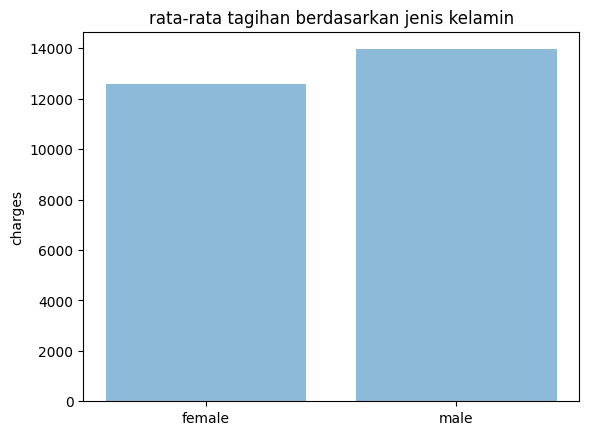

In [85]:
# Perbandingan rata-rata seluruh tagihan berdasarkan jenis kelamin.

avg_charges_male = df.loc[df['sex'] == 'male', 'charges'].mean()
avg_charges_female = df.loc[df['sex'] == 'female', 'charges'].mean()

objects = ('female', 'male')
y_pos = np.arange(len(objects))
performance = [avg_charges_female, avg_charges_male]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('charges')
plt.title('rata-rata tagihan berdasarkan jenis kelamin')

plt.show()

In [86]:
# Mencari tau ada wilayah apa saja dan jumlah data dari tiap wilayah tersebut.

pd.value_counts(df.region)

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [87]:
# Distribusi peluang tagihan di tiap provinsi.

from tabulate import tabulate

n_wilayah = 1338
n_se = 364
n_sw = 325
n_nw = 325
n_ne = 324

prob_se = n_se/n_wilayah
prob_sw = n_sw/n_wilayah
prob_nw = n_nw/n_wilayah
prob_ne = n_ne/n_wilayah

table = [['wilayah', 'peluang tagihan'],
        ['South East', prob_se],
        ['South West', prob_sw],
        ['North West', prob_nw],
        ['North East', prob_ne]]
        
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒════════════╤═══════════════════╕
│ wilayah    │   peluang tagihan │
╞════════════╪═══════════════════╡
│ South East │          0.272048 │
├────────────┼───────────────────┤
│ South West │          0.2429   │
├────────────┼───────────────────┤
│ North West │          0.2429   │
├────────────┼───────────────────┤
│ North East │          0.242152 │
╘════════════╧═══════════════════╛


<AxesSubplot: xlabel='region', ylabel='count'>

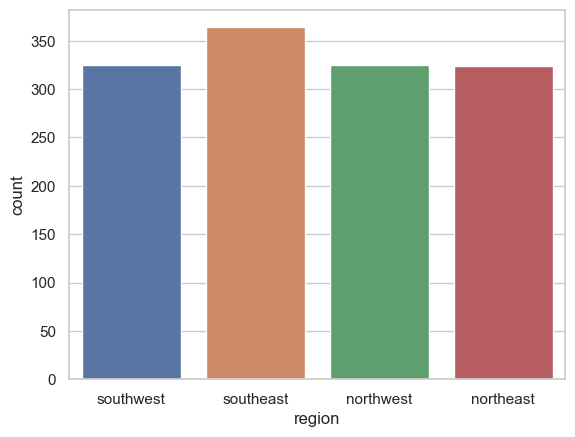

In [88]:
# Proporsi data pada tiap wilayah

sns.set(style="whitegrid", color_codes=True)
sns.countplot(x=df["region"])

<AxesSubplot: xlabel='smoker', ylabel='count'>

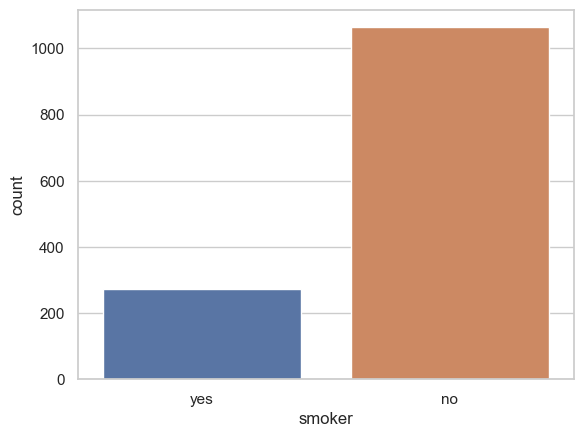

In [89]:
# Proporsi data perokok dan non-perokok

sns.set_theme(style="whitegrid")
sns.countplot(x=df["smoker"])

In [90]:
# Jumlah perokok berdasarkan jenis kelamin

fem_smoker = len(df[(df['smoker']=='yes') & (df['sex']=='female')])
man_smoker = len(df[(df['smoker']=='yes') & (df['sex']=='male')])

In [91]:
# Peluang user memiliki jenis kelamin perempuan jika diketahui user tersebut perokok

n_smoker = len(df['smoker']=='yes')

p_fem_if_smoker = fem_smoker/n_smoker
round(p_fem_if_smoker, 3)


0.086

In [92]:
# Peluang user memiliki jenis kelamin laki-laki jika diketahui user tersebut perokok

p_man_if_smoker = man_smoker/n_smoker
round(p_man_if_smoker, 3)

0.119

# Langkah 3

In [93]:
# Seseorang dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k

tagihan_banyak = df[df["charges"] > 16700].count()['charges']
kriteria_a = (df["bmi"] >25) & (df["charges"] > 16700) 
bmi_above = df[kriteria_a].count()['bmi']

p_above = bmi_above/tagihan_banyak
round(p_above, 2)

0.85

In [94]:
# Seseorang dengan BMI di bawah 25 mendapatkan tagihan kesehatan di atas 16.7k

kriteria_b = (df["bmi"] < 25) & (df["charges"] > 16700) 
bmi_below = df[kriteria_b].count()['bmi']

p_below = bmi_below/tagihan_banyak
round(p_above, 2)

0.85

# Langkah 4


In [95]:
# Korelasi antar variabel dalam data

df = pd.read_csv("insurance.csv")
df.corr(method = 'pearson')

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [96]:
# Mencari korelasi rokok dengan BMI

df[['charges', 'bmi']].corr()

,charges,bmi
charges,1.000000,0.198341
bmi,0.198341,1.000000


In [97]:
# Mencari korelasi rokok dengan umur

df[['charges', 'age']].corr()

,charges,age
charges,1.000000,0.299008
age,0.299008,1.000000


# Langkah 5

In [121]:
# Hipotesis testing tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok (Ho)

import numpy as np
from statsmodels.stats.proportion import proportions_ztest
import math


m0 = df['charges'].mean()
xbar = df.loc[df['smoker'] == 'yes', 'charges'].mean()
std = df.charges.std(ddof=0)
n_sample = df[df["smoker"] == 'yes'].count()['smoker']


test_stat=(xbar-m0)/std*(math.sqrt(n_sample))
print("Dari program di atas hasil uji statistik adalah : ", test_stat)


Dari program di atas hasil uji statistik adalah :  25.67936453595571


In [122]:
import scipy.stats as stats
z_crit=stats.norm.ppf(1-0.05)  # right-tailed test
print(z_crit)

1.6448536269514722


In [123]:
print("Dengan nilai uji statistik", test_stat," dan nilai z_crit", stats.norm.ppf(1-0.05))

Dengan nilai uji statistik 25.67936453595571  dan nilai z_crit 1.6448536269514722


In [126]:
# H0: tagihan kesetan perokok > tagihan kesehatan non perokok

if test_stat > z_crit:
    print("Terima hypothesis 0 yang menyatakan tagihan kesehatan perokok lebih dari tagihan kesehatan non-perokok")
else:
    print("Tolak hypothesis 0 yang menyatakan tagihan kesehatan perokok lebih dari tagihan kesehatan non-perokok")

Terima hypothesis 0 yang menyatakan tagihan kesehatan perokok lebih dari tagihan kesehatan non-perokok


In [127]:
# Variansi tagihan kesehatan perokok dan non perokok sama (H0: var_1 = var_2)

# Memasukan nilai-nilai parameter

import statistics 

n_1 = df[df["smoker"] == 'yes'].count()['smoker']
n_2 = df[df["smoker"] == 'no'].count()['smoker']
dfree_1 = n_1 - 1
dfree_2 = n_2 - 1

rataan_1 = df.loc[df['smoker'] == 'yes', 'charges'].mean()
rataan_2 = df.loc[df['smoker'] == 'no', 'charges'].mean()

std_1 = df.loc[df['smoker'] == 'yes', 'charges'].std(ddof=0)
std_2 = df.loc[df['smoker'] == 'no', 'charges'].std(ddof=0)

var_1 = statistics.variance(df.loc[df['smoker'] == 'yes', 'charges'])
var_2 = statistics.variance(df.loc[df['smoker'] == 'no', 'charges'])

In [128]:
# Menentukan uji statistik

f_test = var_1/var_2
print("Dari program di atas hasil uji statistik adalah : ", f_test)

Dari program di atas hasil uji statistik adalah :  3.707884538770159


In [129]:
# Nilai Critical Value berdasarkan critical f-value dari f-table dengan nilai alpha 0.05

import scipy.stats as stats

f_crit=stats.f.ppf(1 - 0.05, dfree_1, dfree_2)
print(f_crit)

1.1662297531965873


In [130]:
# Nilai Critical Value berdasarkan critical f-value dari f-table dengan nilai alpha 0.05
import scipy.stats as stats
print("Dengan nilai uji statistik", f_test," dan nilai f_crit", stats.f.ppf(1 - 0.05, dfree_1, dfree_2) )

Dengan nilai uji statistik 3.707884538770159  dan nilai f_crit 1.1662297531965873


In [132]:
# Keputusan

if f_test > f_crit:
  print("Tolak null hypothesis yang menyatakan variansi tagihan kesehatan perokok dan non perokok sama")
else:
  print("Terima null hypothesis yang menyatakan variansi tagihan kesehatan perokok dan non perokok sama")

Tolak null hypothesis yang menyatakan variansi tagihan kesehatan perokok dan non perokok sama


In [109]:
# Tagihan kesehatan laki-laki lebih besar dari perempuan (H0)

import numpy as np
from statsmodels.stats.proportion import proportions_ztest
import math


m0 = df['charges'].mean()
xbar = df.loc[df['sex'] == 'male', 'charges'].mean()
std = df.loc[df['sex'] == 'male', 'charges'].std(ddof=0)
n_sample = df[df["sex"] == 'male'].count()['sex']


test_stat=(xbar-m0)/std*(math.sqrt(n_sample))
print("Dari program di atas hasil uji statistik adalah : ", test_stat)

Dari program di atas hasil uji statistik adalah :  1.3767426831578993


In [114]:
# Right tailed test

import scipy.stats as stats

z_crit=stats.norm.ppf(1-0.05)
print(z_crit)

1.6448536269514722


In [112]:
print("Dengan nilai uji statistik", test_stat," dan nilai z_crit", stats.norm.ppf(1-0.05))

Dengan nilai uji statistik 1.3767426831578993  dan nilai z_crit 1.6448536269514722


In [133]:
# Pengambilan keputusan

if test_stat > z_crit:
    print("Terima null hypothesis yang menyatakan tagihan kesehatan laki-laki lebih besar dari perempuan")
else:
    print("Tolak null hypothesis yang menyatakan tagihan kesehatan laki-laki lebih besar dari perempuan")

Terima null hypothesis yang menyatakan tagihan kesehatan laki-laki lebih besar dari perempuan
